In [2]:
#import required/useful libraries
import nltk
import pandas as pd
import matplotlib
import numpy as np
import urllib.request

print('finished processing import statements')

# Note: these packages are all available if you run this notebook on jupyter.kent.ac.uk

#Read in data
prefix = "https://raw.githubusercontent.com/annajordanous/COMP6481-8481/main/"
suffix = ".pdf.txt"
samples = ["instb", "unitb", "instw", "unitw"]
b_env = ["TheUniversityofBirmingham", "TheUniversityofSheffield", "UniversityofNottingham,The", 
         "TheUniversityofLancaster", "UniversityofBristol", "UniversityofSouthampton", 
         "TheUniversityofManchester", "UniversityofDundee", "UniversityofYork"]
w_env = ["AstonUniversity", "BirkbeckCollege", "LiverpoolJohnMooresUniversity",
         "ManchesterMetropolitanUniversity", "NottinghamTrentUniversity", "TheUniversityofHuddersfield",
         "TheUniversityofWestLondon", "UniversityofEastLondon", "UniversityofStirling"]
k_env = ["TheUniversityofKent"]
instb = {}
instw = {}
instk = {}
unitb = {}
unitw = {}
unitk = {}

def readURL(filename):
    # open a connection to a URL using urllib
    webUrl  = urllib.request.urlopen(filename)
    # read the data from the URL and print it
    data = webUrl.read()
    return data
    
def readFiles(x, tag):
    itag = "inst"+tag
    filenameI = prefix+itag+"/"+itag+x+suffix
    utag = "unit"+tag
    filenameU = prefix+utag+"/"+utag+x+"-11"+suffix
    dataI = str(readURL(filenameI))
    dataU = str(readURL(filenameU))
    return(dataI, dataU)

print("finished setting up variables and functions for data readin")

# this cell may take some time to run

# read in textual data 
for x in b_env:
    (instb[x], unitb[x]) = readFiles(x, "b")
    
for x in w_env:
    (instw[x], unitw[x]) = readFiles(x, "w")

for x in k_env:
    (instk[x], unitk[x]) = readFiles(x, "k")
    
print("Finished reading in textual data")
# read in spreadsheet data 
docAwards = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-DoctoralDegreesAwarded.xlsx?raw=true')
researchIncome = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncome.xlsx?raw=true')
researchIncomeInKind = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncomeInKind.xlsx?raw=true')
resultsSummary = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-resultsSummary.xlsx?raw=true')
# This file is just for information
# https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-selectionCommentary.xlsx

print("Finished reading in spreadsheet data")

finished processing import statements
finished setting up variables and functions for data readin
Finished reading in textual data
Finished reading in spreadsheet data


In [3]:
# process docawards

# set headers to correct row
docAwards.columns = docAwards.iloc[3]
# remove the title rows from dataset
docAwards = docAwards.iloc[4:]

# set index to institution name
docAwards = docAwards.set_index("Institution name")

In [4]:
# create a new row with average vals
docAwards["Average Numeber of doctoral degrees"] = docAwards.iloc[:, 8:14].mean(axis=1).round(2)

docAwards.head()

3,Institution UKPRN code,Main panel,Unit of assessment number,Unit of assessment name,Multiple submission letter,Multiple submission name,Sample,Number of doctoral degrees awarded in academic year 2013,Number of doctoral degrees awarded in academic year 2014,Number of doctoral degrees awarded in academic year 2015,Number of doctoral degrees awarded in academic year 2016,Number of doctoral degrees awarded in academic year 2017,Number of doctoral degrees awarded in academic year 2018,Number of doctoral degrees awarded in academic year 2019,Average Numeber of doctoral degrees
Institution name,,,,,,,,,,,,,,,
Aston University,10007759,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,1.67,3.91,4.99,3.67,2.67,4,2.67,3.65
Birkbeck College,10007760,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,4,1,2,4.5,3.5,5,3,3.17
Liverpool John Moores University,10003957,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,6,8,2,4,15,22.5,14,10.92
Manchester Metropolitan University,10004180,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,3,9,4,6,4,5,3,5.17
Nottingham Trent University,10004797,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,5,5,5,4,6,5,4,4.83


Index(['Number of doctoral degrees awarded in academic year 2014',
       'Number of doctoral degrees awarded in academic year 2015',
       'Number of doctoral degrees awarded in academic year 2016',
       'Number of doctoral degrees awarded in academic year 2017',
       'Number of doctoral degrees awarded in academic year 2018',
       'Number of doctoral degrees awarded in academic year 2019'],
      dtype='object', name=3)
['Aston University' 'Birkbeck College' 'Liverpool John Moores University'
 'Manchester Metropolitan University' 'Nottingham Trent University'
 'The University of Birmingham' 'The University of Huddersfield'
 'The University of Kent' 'The University of Lancaster'
 'The University of Manchester' 'The University of Sheffield'
 'The University of West London' 'University of Bristol'
 'University of Dundee' 'University of East London'
 'University of Nottingham, The' 'University of Southampton'
 'University of Stirling' 'University of York']
1
Institution name
Aston

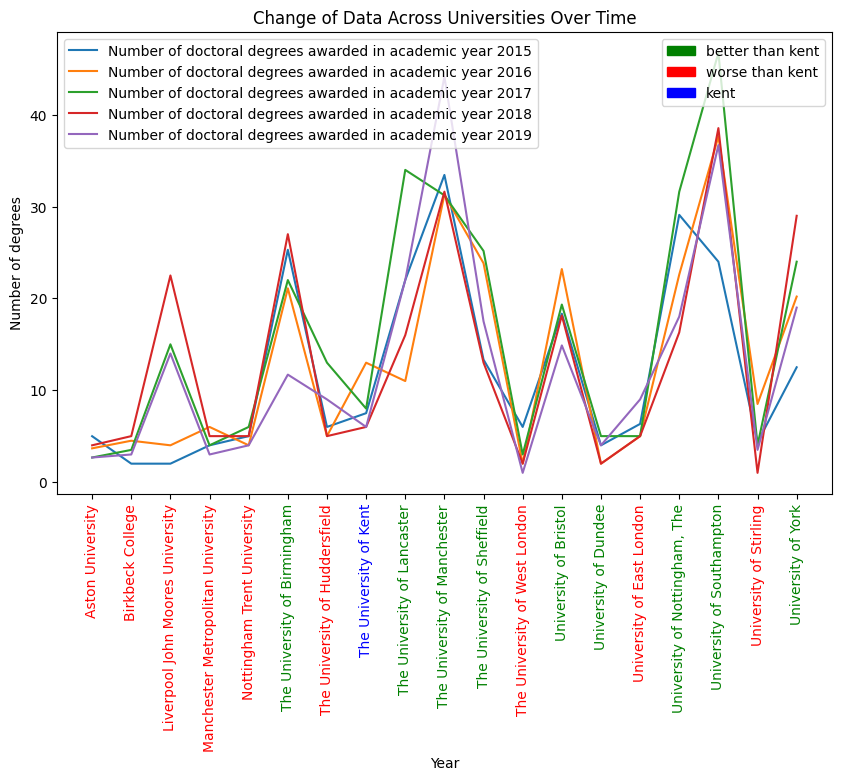

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import linregress

# plot docawards on a line chart to show progression over time
# Set x-axis and y-axis values
#x = docAwards.columns[1:]
x = docAwards.index.values
y = docAwards.iloc[:, 8:14]

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each university and plot a line
print(y.columns)
print(x)
for i in range(1, len(y.columns)):
    print(i)
    print(y.iloc[:, i])
    print("y.columns[i]: "+y.columns[i])
    ax.plot(x, y.iloc[:, i], label=y.columns[i])

# Set title, labels, and legend
ax.set_title('Change of Data Across Universities Over Time')
#plt.xticks(rotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Number of degrees')

# Add x-axis ticks and labels
xticklabels = ax.get_xticklabels()
for i, label in enumerate(xticklabels):
    if b_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('g')
    elif w_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('r')
    elif k_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('b')
    label.set_rotation(90)
        
# Add legend for label colors
blue_patch = mpatches.Patch(color='g', label='better than kent')
green_patch = mpatches.Patch(color='r', label='worse than kent')
red_patch = mpatches.Patch(color='b', label='kent')
label_legend = ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right')
# Add the label legend to the plot
plt.gca().add_artist(label_legend)

ax.legend()
plt.show()

In [6]:
newDocAwards = docAwards.iloc[:, 8:14].transpose()
#newDocAwards = newDocAwards.set_index("Institution name")
newDocAwards

Institution name,Aston University,Birkbeck College,Liverpool John Moores University,Manchester Metropolitan University,Nottingham Trent University,The University of Birmingham,The University of Huddersfield,The University of Kent,The University of Lancaster,The University of Manchester,The University of Sheffield,The University of West London,University of Bristol,University of Dundee,University of East London,"University of Nottingham, The",University of Southampton,University of Stirling,University of York
3,,,,,,,,,,,,,,,,,,,
Number of doctoral degrees awarded in academic year 2014,3.91,1,8,9,5,19.75,9,6,18,22.92,12.83,5,22.2,4,1,19.77,34.75,7,24
Number of doctoral degrees awarded in academic year 2015,4.99,2,2,4,5,25.3,6,7.5,22,33.45,13.33,6,18.34,4,6.33,29.1,24,4.33,12.5
Number of doctoral degrees awarded in academic year 2016,3.67,4.5,4,6,4,21.1,5,13,11,31.3,23.83,2,23.2,2,5,22.6,37.65,8.5,20.2
Number of doctoral degrees awarded in academic year 2017,2.67,3.5,15,4,6,22,13,8,34,31.23,25.17,3,19.33,5,5,31.62,46.75,4,24
Number of doctoral degrees awarded in academic year 2018,4,5,22.5,5,5,27,5,6,16,31.63,13,2,18.14,2,5,16.3,38.55,1,29
Number of doctoral degrees awarded in academic year 2019,2.67,3,14,3,4,11.7,9,6,22,44.15,17.5,1,14.88,4,9,18.02,36.7,3.5,19


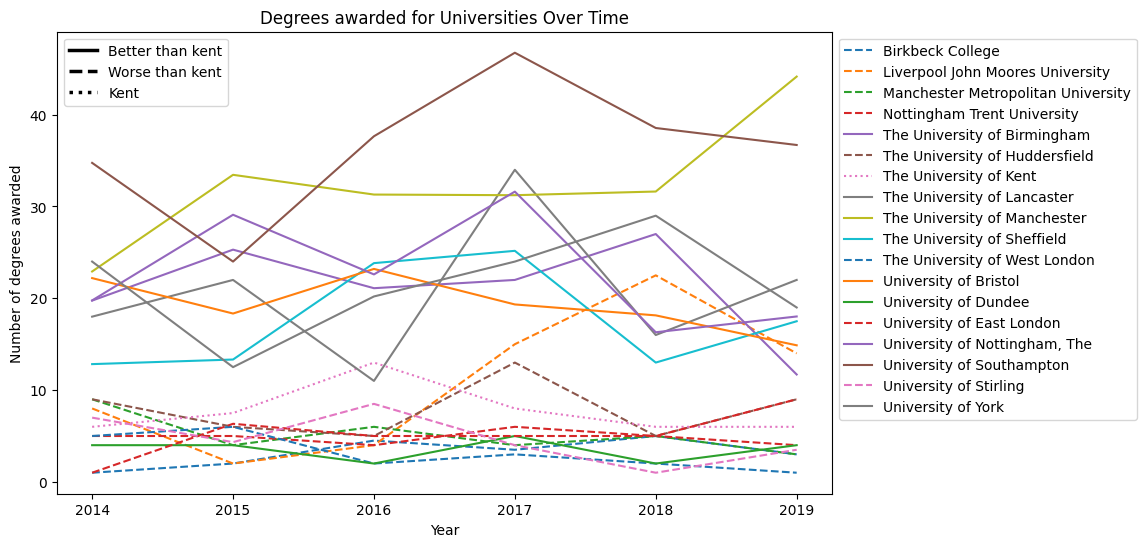

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
#import numpy as np
#from scipy.stats import linregress


# plot docawards on a line chart to show progression over time
# Set x-axis and y-axis values
# x is the column titles for each year, but we only want the year part
x = newDocAwards.index.values
x = [i[52:] for i in x]
# y is each row for every year (all the columns in the new df)
y = newDocAwards.iloc[:, :]
# we need a line for each uni
lines = newDocAwards.columns

# markers for better/worse/kent
markers = ["o", "s", "^"]
marker_styles = ['-', '--', ':']  # for different line styles

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each uni and plot it a line
for i in range(1, len(lines)):
    if b_env.count(lines[i].replace(" ", "")) == 1:
        ax.plot(x, y.iloc[:, i], label=lines[i], linestyle=marker_styles[0])
    elif w_env.count(lines[i].replace(" ", "")) == 1:
        ax.plot(x, y.iloc[:, i], label=lines[i], linestyle=marker_styles[1])
    elif k_env.count(lines[i].replace(" ", "")) == 1:
        ax.plot(x, y.iloc[:, i], label=lines[i], linestyle=marker_styles[2])

# Set title, labels, and legend
ax.set_title('Degrees awarded for Universities Over Time')
#plt.xticks(rotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Number of degrees awarded')
        
# create custom legend with only linestyles
legend_lines = [
    mlines.Line2D([], [], color='black', linewidth=2.5, linestyle=marker_styles[0]),
    mlines.Line2D([], [], color='black', linewidth=2.5, linestyle=marker_styles[1]),
    mlines.Line2D([], [], color='black', linewidth=2.5, linestyle=marker_styles[2])
]
legend_labels = ["Better than kent", "Worse than kent", "Kent"]
legend2 = ax.legend(legend_lines, legend_labels, loc='upper left')
plt.gca().add_artist(legend2)

ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [23]:
# process researchIncome
researchIncome = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncome.xlsx?raw=true')

# set headers to correct row
researchIncome.columns = researchIncome.iloc[3]
# remove the title rows from dataset
researchIncome = researchIncome.iloc[4:]

# get rid of rows we dont need
mask = researchIncome["Income source"] == "Total income"
filtered_researchIncome = researchIncome[mask]

# rm columns we dont need
filtered_research_income = filtered_researchIncome.loc[:, ["Institution name", 
    "Sample", "Total income for academic years 2013-14 to 2019-20"]]

# set index to institution name
#researchIncome = researchIncome.set_index("Institution name")
#researchIncome
filtered_research_income

3,Institution name,Sample,Total income for academic years 2013-14 to 2019-20
18,Aston University,ENV WORSE THAN KENT,6186326
33,Birkbeck College,ENV WORSE THAN KENT,1692167
48,Liverpool John Moores University,ENV WORSE THAN KENT,4424332
63,Manchester Metropolitan University,ENV WORSE THAN KENT,3588231
78,Nottingham Trent University,ENV WORSE THAN KENT,3064008
93,The University of Birmingham,ENV BETTER THAN KENT,20885858
108,The University of Huddersfield,ENV WORSE THAN KENT,2002821
123,The University of Kent,KENT,8337523
138,The University of Lancaster,ENV BETTER THAN KENT,28515606
153,The University of Manchester,ENV BETTER THAN KENT,58440853


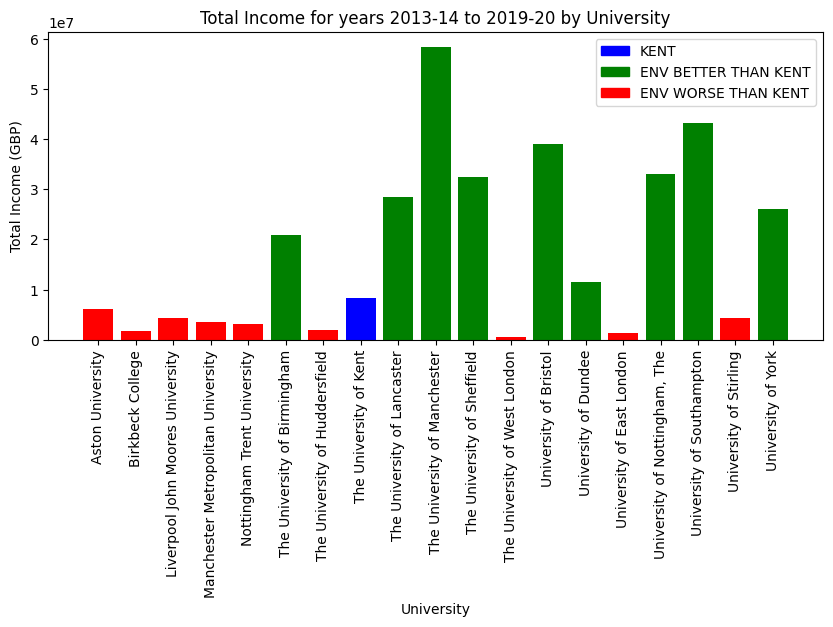

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new dataframe copy
df_plot = filtered_research_income.copy()

# Rename the columns for readability
df_plot.columns = ["University", "Environmental Performance", "Total Income"]

# Create a dictionary to map environmental performance values to colors
color_dict = {
    'KENT': 'blue',
    'ENV BETTER THAN KENT': 'green',
    'ENV WORSE THAN KENT': 'red'
}

# Create a list of colors for each institution based on their environmental performance
colors = [color_dict[x] for x in df_plot["Environmental Performance"]]

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(df_plot["University"], df_plot["Total Income"], color=colors)

# Set the chart title and axis labels
ax.set_title("Total Income for years 2013-14 to 2019-20 by University")
ax.set_xlabel("University")
ax.set_ylabel("Total Income (GBP)")

# Add a legend for the environmental performance categories
legend_handles = [
    plt.Rectangle((0,0),1,1, color=color_dict[x]) for x in color_dict
]
legend_labels = list(color_dict.keys())
ax.legend(legend_handles, legend_labels)

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [10]:
# process researchIncome
researchIncome2 = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncome.xlsx?raw=true')

# set headers to correct row
researchIncome2.columns = researchIncome2.iloc[3]
# remove the title rows from dataset
researchIncome2 = researchIncome2.iloc[4:]

# get rid of rows we dont need
#mask = researchIncome["Income source"] == "Total income"
#filtered_researchIncome = researchIncome[mask]

# rm columns we dont need
filtered_research_income2 = researchIncome2.loc[:, ["Institution name", "Sample", "Income source", "Total income for academic years 2013-14 to 2019-20"]]
filtered_research_income2.columns = ["University", "Environmental performance", "Income source", "Total income"]

# set index to institution name
#researchIncome = researchIncome.set_index("Institution name")
#researchIncome
filtered_research_income2

,University,Environmental performance,Income source,Total income
4,Aston University,ENV WORSE THAN KENT,"BEIS Research Councils, The Royal Society, Bri...",273497
5,Aston University,ENV WORSE THAN KENT,UK-based charities (open competitive process),283213
6,Aston University,ENV WORSE THAN KENT,UK-based charities (other),511369
7,Aston University,ENV WORSE THAN KENT,UK central government bodies/local authorities...,1867826
8,Aston University,ENV WORSE THAN KENT,UK central government tax credits for research...,112005
...,...,...,...,...
284,University of York,ENV BETTER THAN KENT,EU (excluding UK) other,360696
285,University of York,ENV BETTER THAN KENT,Non-EU-based charities (open competitive process),0
286,University of York,ENV BETTER THAN KENT,Non-EU industry commerce and public corporations,285457
287,University of York,ENV BETTER THAN KENT,Non-EU other,16243


In [24]:
grouped_research_income = filtered_research_income2.groupby("University")

#df = filtered_research_income2.copy()

# calculate the total income for each university
pivot_table = pd.pivot_table(filtered_research_income2, index=['University'], 
    columns=['Income source'], values=['Total income'], aggfunc='sum', fill_value=0)

# calculate the percentage contribution of each income source to the total income
total_income = pivot_table['Total income']['Total income']
income_contributions = pivot_table['Total income'].div(total_income, axis=0).mul(100)

income_contributions = income_contributions.drop(('Total income'), axis=1)

# print the percentage contribution of each income source to the total income
print(income_contributions)

Income source                       BEIS Research Councils, The Royal Society, British Academy and The Royal Society of Edinburgh  \
University                                                                                                                          
Aston University                                                             4.420992                                               
Birkbeck College                                                            65.534253                                               
Liverpool John Moores University                                            22.595004                                               
Manchester Metropolitan University                                          21.006451                                               
Nottingham Trent University                                                  2.513179                                               
The University of Birmingham                                         

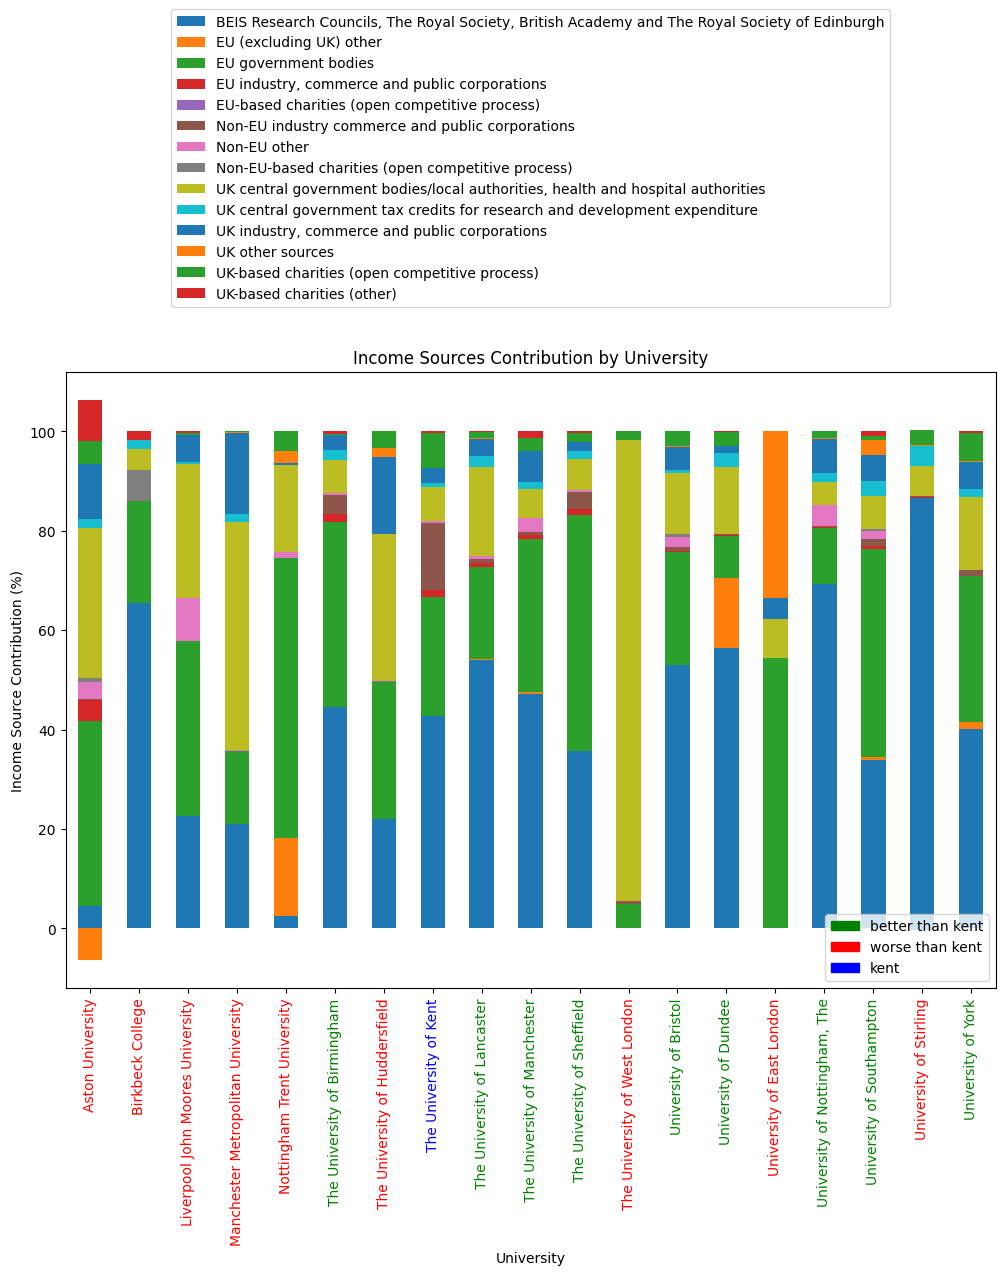

In [22]:
# create a stacked bar chart
ax = income_contributions.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='none')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# add chart title and axis labels
plt.title('Income Sources Contribution by University')
plt.xlabel('University')
plt.ylabel('Income Source Contribution (%)')

# Add x-axis ticks and labels
xticklabels = ax.get_xticklabels()
for i, label in enumerate(xticklabels):
    if b_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('g')
    elif w_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('r')
    elif k_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('b')
    label.set_rotation(90)
    
# Add legend for label colors
blue_patch = mpatches.Patch(color='g', label='better than kent')
green_patch = mpatches.Patch(color='r', label='worse than kent')
red_patch = mpatches.Patch(color='b', label='kent')
label_legend = ax.legend(handles=[blue_patch, green_patch, red_patch], loc='lower right')
# Add the label legend to the plot
plt.gca().add_artist(label_legend)

ax.legend(bbox_to_anchor=(0.5, 1.6), loc='upper center')
# show the chart
plt.show()

IndexError: Too many levels: Index has only 1 level, not 2

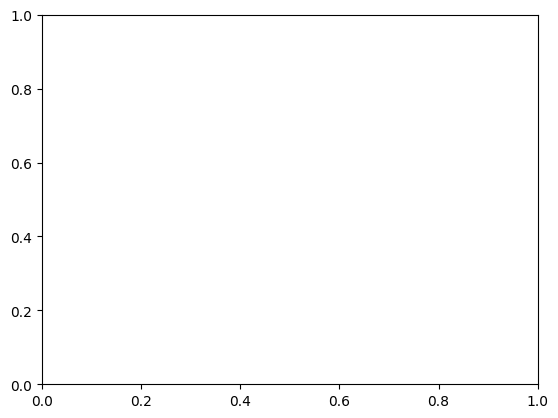

In [13]:
# create a list of universities that are in the "worse" group
worse_unis = ['University of XYZ', 'Another University']

# create a list of universities that are in the "better" group
better_unis = ['University of ABC', 'Yet Another University']

# set up the plot
fig, ax = plt.subplots()

# set the width of each bar
bar_width = 0.8

pivot_table = income_contributions.copy()

# create the bars for each income source
for i, source in enumerate(pivot_table.columns.get_level_values(1).unique()):
    if source != 'Total income':
        bars = ax.bar(pivot_table.index, pivot_table['total_income'][source], bottom=pivot_table['total_income'].loc[:, :'Total income'].sum(axis=1), width=bar_width, label=source)
        # set the hatch pattern based on which group the university is in
        for j, uni in enumerate(pivot_table.index):
            bars[j].set_hatch('//')

# set the y-axis label and the legend
ax.set_ylabel('Total Income')
ax.legend()

# show the plot
plt.show()